# Import Dependencies

In [1]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Data preprocessing

## Read the dataset

In [5]:
dataset = pandas.read_csv('student_scores.csv')
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# EDA


## Visualize cleaned data

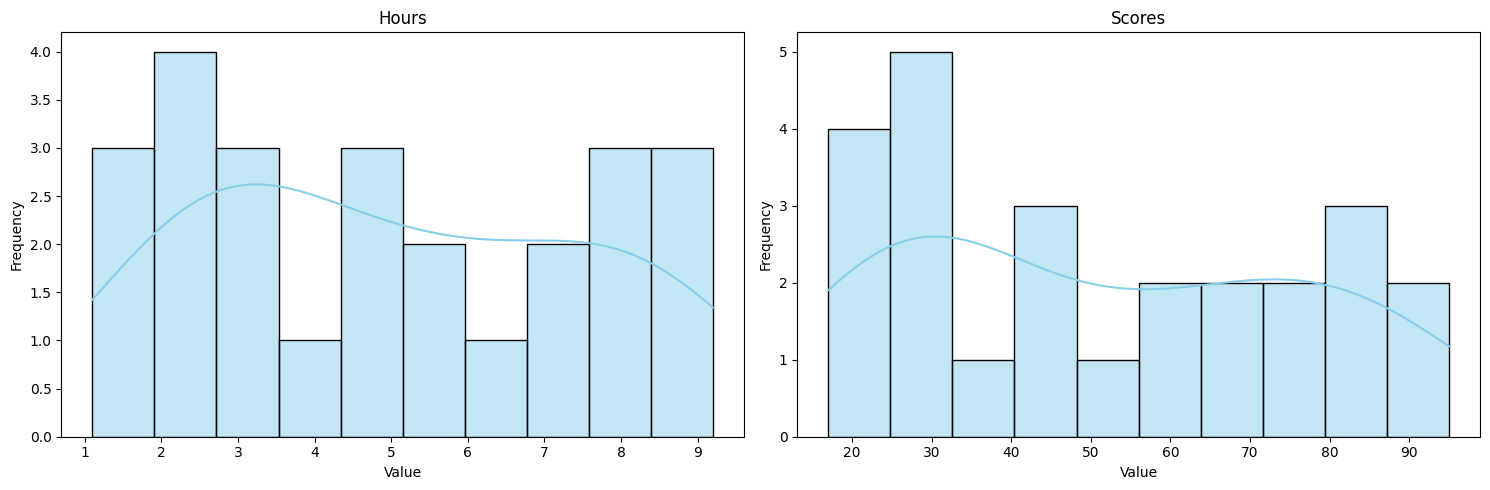

In [8]:
# Set the number of features
num_features = dataset.select_dtypes(include='number').shape[1]

# Create a single figure with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))

# Plotting the distribution for each feature in smaller axes
for i, column in enumerate(dataset.select_dtypes(include='number').columns):
    sns.histplot(dataset[column], bins=10, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Visualize the correlation

<Axes: >

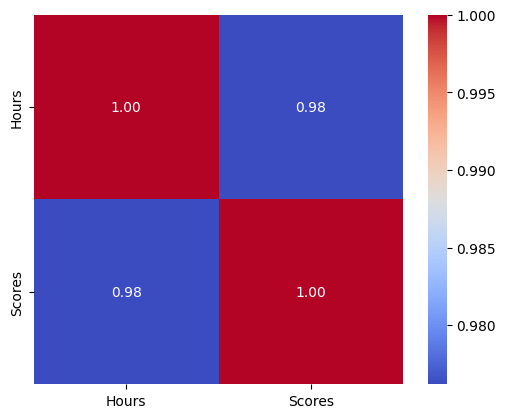

In [9]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Dataset Processing

## Dataset 1: Original Values

In [10]:
dataset1 = dataset.copy()
dataset1.drop(['Scores'], axis=1, inplace=True)
dataset1['Scores'] = dataset['Scores']
dataset1.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Dataset 2: Normalize the data

In [11]:
dataset2 = dataset.copy()
dataset2.drop(['Scores'], axis=1, inplace=True)
features = dataset2[dataset2.columns]
DatasetScaler = StandardScaler()
DatasetScaler.fit(features.values)
features = DatasetScaler.transform(features.values)
dataset2 = pandas.DataFrame(features, columns = dataset2.columns)
dataset2['Scores'] = dataset['Scores']
dataset2.head(5)

,Hours,Scores
0,-1.015328,21
1,0.035569,47
2,-0.732394,27
3,1.409819,75
4,-0.611137,30


## Dataset 3: Scale the dataset

In [12]:
dataset3 = dataset.copy()
dataset3.drop(['Scores'], axis=1, inplace=True)
features = dataset3[dataset3.columns]
DatasetScaler = MinMaxScaler()
DatasetScaler.fit(features.values)
features = DatasetScaler.transform(features.values)
dataset3 = pandas.DataFrame(features, columns = dataset3.columns)
dataset3['Scores'] = dataset['Scores']
dataset3.head(5)

,Hours,Scores
0,0.172840,21
1,0.493827,47
2,0.259259,27
3,0.913580,75
4,0.296296,30


# Linear Regression with Keras

# Define the model

In [13]:
def LinearRegression(inputs):
  linear_regression_model = keras.Sequential([
    keras.layers.Input(shape=(inputs.shape[1],)),
    keras.layers.Dense(units=1)
  ])

  return linear_regression_model

## Define Hyperparameter

In [14]:
LOSS_FUNCTION='mean_squared_error'
OPTIMIZER='adam'
EPOCHS=250
BATCH_SIZE=12
VALIDATION_SPLIT=0.3

## Dataset 1

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset1.drop(columns=['Scores']), dataset1['Scores'], test_size=0.3, random_state=1) # 70% training and


In [17]:
model1 = LinearRegression(X_train)
model1.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION)

In [18]:
history = model1.fit(X_train,Y_train,epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)

Epoch 1/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3757.0779 - val_loss: 3708.1838
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 3756.2922 - val_loss: 3707.4062
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 3755.5068 - val_loss: 3706.6282
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 3754.7212 - val_loss: 3705.8508
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 3753.9365 - val_loss: 3705.0732
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 3753.1506 - val_loss: 3704.2959
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3752.3657 - val_loss: 3703.5183
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3751.5806 - val_loss: 3702.7410
Epoch 9/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3750.7959 - val_loss: 3701.9631
Epoch 10/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3750.0115 - val_loss: 3701.1863
Epoch 11/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3749.2258 - val_loss: 3700.4092
Epoch 

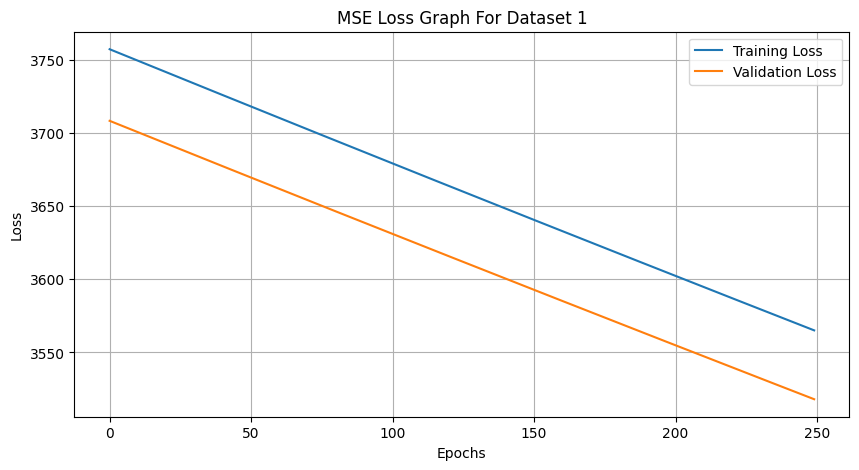

In [19]:
# Plotting the loss graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MSE Loss Graph For Dataset 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [20]:
print(X_test.shape)
Y_predict = model1.predict(X_test)
print(mean_squared_error(Y_test, Y_predict) / X_test.shape[0])

(8, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
482.3425462742498


## Dataset 2

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset2.drop(columns=['Scores']), dataset2['Scores'], test_size=0.3, random_state=1) # 70% training and

In [22]:
model2 = LinearRegression(X_train)
model2.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION)
history = model2.fit(X_train,Y_train,epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)

Epoch 1/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step - loss: 3106.0420 - val_loss: 3077.7012
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 3105.8955 - val_loss: 3077.5598
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3105.7490 - val_loss: 3077.4187
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3105.6025 - val_loss: 3077.2776
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3105.4568 - val_loss: 3077.1365
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3105.3103 - val_loss: 3076.9951
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 3105.1641 - val_loss: 3076.8542
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3105.0178 - val_loss: 3076.7129
Epoch 9/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 3104.8713 - val_loss: 3076.5713
Epoch 10/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 3104.7251 - val_loss: 3076.4307
Epoch 11/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 3104.5789 - val_loss: 3076.2898
Epoch 

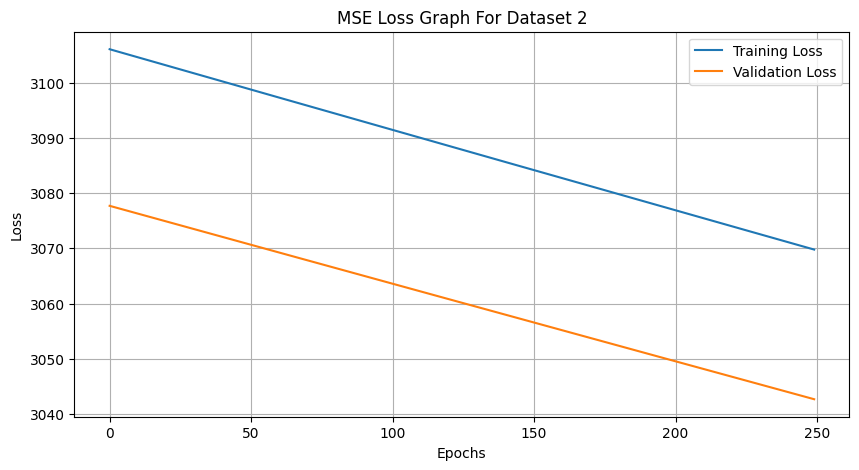

In [23]:
# Plotting the loss graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MSE Loss Graph For Dataset 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [24]:
print(X_test.shape)
Y_predict = model2.predict(X_test)
print(mean_squared_error(Y_test, Y_predict) / X_test.shape[0])

(8, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
416.6838416409961


## Dataset 3

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset3.drop(columns=['Scores']), dataset3['Scores'], test_size=0.3, random_state=1) # 70% training and
model3 = LinearRegression(X_train)
model3.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION)
history = model3.fit(X_train,Y_train,epochs=EPOCHS, validation_split=VALIDATION_SPLIT, batch_size=BATCH_SIZE)

Epoch 1/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step - loss: 3083.3232 - val_loss: 3045.0566
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 3083.1626 - val_loss: 3044.8953
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 3083.0022 - val_loss: 3044.7344
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3082.8416 - val_loss: 3044.5732
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3082.6812 - val_loss: 3044.4121
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3082.5205 - val_loss: 3044.2512
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3082.3601 - val_loss: 3044.0898
Epoch 8/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 3082.1995 - val_loss: 3043.9290
Epoch 9/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3082.0391 - val_loss: 3043.7678
Epoch 10/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 3081.8787 - val_loss: 3043.6067
Epoch 11/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 3081.7178 - val_loss: 3043.4456
Epoch

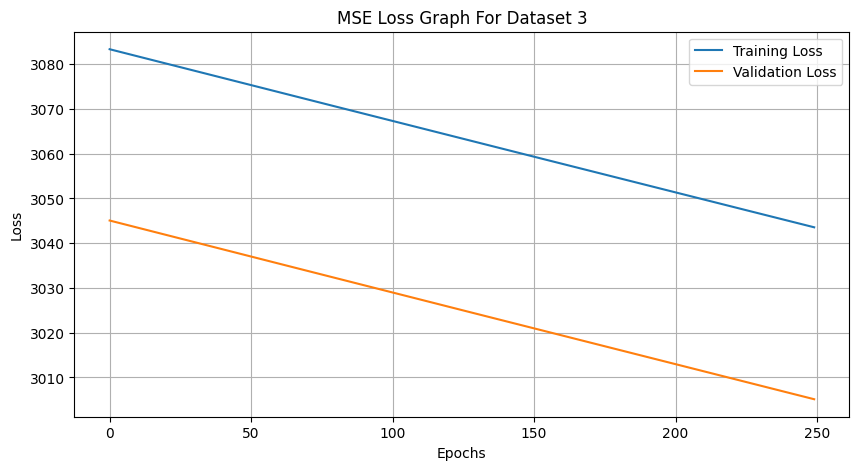

In [26]:
# Plotting the loss graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MSE Loss Graph For Dataset 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [27]:
print(X_test.shape)
Y_predict = model3.predict(X_test)
print(mean_squared_error(Y_test, Y_predict) / X_test.shape[0])

(8, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
412.56025230747497
